### Introduction to Deep4Rec

Brief practical introduction to Deep4Rec. We'll show how to load a dataset and train a model.

Check more examples in the [examples folder]()!

- Author: Marianne Linhares Monteiro ([github: mari-linhares](https://github.com/mari-linhares/), [twitter: hereismari](https://twitter.com/hereismari))


First let's import the required dependencies.

In [1]:
import sys

sys.path.append('../../')

import os
# Ignore some tensorflow logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from matplotlib import pyplot as plt
import tensorflow as tf

/media/store/Documentos/deep4rec/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/media/store/Documentos/deep4rec/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/media/store/Documentos/deep4rec/env/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/media/store/Documentos/deep4rec/env/lib

Now let's import Deep4Rec.

There are two main modules in deep4rec that you usually are going to use:
    
 * `datasets`: Common datasets used for Recommendation Systems evaluation already preprocessed and ready to be used.
 * `models`: Recommenders based on deep learning.
 
Let's import them.

In [2]:
from deep4rec import datasets
from deep4rec import models

We can choose any dataset listed in the datasets options.

In [3]:
datasets.options()

['frappe', 'ml-100k']

In [4]:
# Build chosen dataset
ds = datasets.build_dataset("ml-100k")

We can choose any model listed in the models options.

In [5]:
models.options()

['FM', 'NeuralFM', 'NeuralMF', 'WideDeep']

Let's start with the FM model.

In [6]:
fm = models.FM(ds, num_units=16)

In order to train a model just call `train`.

In [7]:
BATCH_SIZE = 128
EPOCHS = 10
LR = 0.04

fm.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1, Time: 8.635748 (s)


 10%|█         | 1/10 [00:10<01:32, 10.33s/it]

------------ train losses ------------
rmse: 0.981110
------------ test losses ------------
rmse: 1.018286
Epoch 2, Time: 8.899650 (s)


 20%|██        | 2/10 [00:20<01:23, 10.41s/it]

------------ train losses ------------
rmse: 0.949392
------------ test losses ------------
rmse: 0.990106
Epoch 3, Time: 9.685752 (s)


 30%|███       | 3/10 [00:32<01:14, 10.69s/it]

------------ train losses ------------
rmse: 0.938095
------------ test losses ------------
rmse: 0.978891
Epoch 4, Time: 9.439485 (s)


 40%|████      | 4/10 [00:43<01:04, 10.80s/it]

------------ train losses ------------
rmse: 0.929387
------------ test losses ------------
rmse: 0.970615
Epoch 5, Time: 9.792871 (s)


 50%|█████     | 5/10 [00:54<00:54, 10.97s/it]

------------ train losses ------------
rmse: 0.934910
------------ test losses ------------
rmse: 0.976841
Epoch 6, Time: 10.000162 (s)


 60%|██████    | 6/10 [01:06<00:44, 11.17s/it]

------------ train losses ------------
rmse: 0.931546
------------ test losses ------------
rmse: 0.973746
Epoch 7, Time: 10.108546 (s)


 70%|███████   | 7/10 [01:18<00:33, 11.33s/it]

------------ train losses ------------
rmse: 0.921249
------------ test losses ------------
rmse: 0.963578
Epoch 8, Time: 10.345304 (s)


 80%|████████  | 8/10 [01:29<00:23, 11.52s/it]

------------ train losses ------------
rmse: 0.920731
------------ test losses ------------
rmse: 0.963029
Epoch 9, Time: 10.668472 (s)


 90%|█████████ | 9/10 [01:42<00:11, 11.77s/it]

------------ train losses ------------
rmse: 0.919433
------------ test losses ------------
rmse: 0.962927
Epoch 10, Time: 11.035254 (s)


100%|██████████| 10/10 [01:55<00:00, 11.50s/it]

------------ train losses ------------
rmse: 0.916302
------------ test losses ------------
rmse: 0.959859


Let's now try NeuralFM and NeuralMF models and compare them. We just need to add a few lines of code and we're ready to go!

In [8]:
neuralfm = models.NeuralFM(ds,
                     num_units=16,
                     layers=[16, 8],
                     dropout_prob=[0.1, 0.1, 0.1]  # dropout for layer 1, layer 2 and features weights.
                    )

neuralfm.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch 1, Time: 23.049842 (s)
------------ train losses ------------
rmse: 0.987296


 10%|█         | 1/10 [00:27<04:03, 27.10s/it]

------------ test losses ------------
rmse: 1.019955
Epoch 2, Time: 22.838770 (s)
------------ train losses ------------
rmse: 0.970849


 20%|██        | 2/10 [00:53<03:35, 27.00s/it]

------------ test losses ------------
rmse: 1.012186
Epoch 3, Time: 23.063582 (s)
------------ train losses ------------
rmse: 0.971707


 30%|███       | 3/10 [01:20<03:08, 26.97s/it]

------------ test losses ------------
rmse: 1.003069
Epoch 4, Time: 23.286617 (s)
------------ train losses ------------
rmse: 0.976189


 40%|████      | 4/10 [01:47<02:42, 27.04s/it]

------------ test losses ------------
rmse: 1.005913
Epoch 5, Time: 23.931357 (s)
------------ train losses ------------
rmse: 0.924355


 50%|█████     | 5/10 [02:15<02:16, 27.25s/it]

------------ test losses ------------
rmse: 0.972839
Epoch 6, Time: 24.628929 (s)
------------ train losses ------------
rmse: 0.888484


 60%|██████    | 6/10 [02:44<01:50, 27.68s/it]

------------ test losses ------------
rmse: 0.955433
Epoch 7, Time: 24.641237 (s)
------------ train losses ------------
rmse: 0.913265


 70%|███████   | 7/10 [03:12<01:23, 27.93s/it]

------------ test losses ------------
rmse: 0.979396
Epoch 8, Time: 24.258035 (s)
------------ train losses ------------
rmse: 0.897899


 80%|████████  | 8/10 [03:41<00:56, 28.00s/it]

------------ test losses ------------
rmse: 0.962202
Epoch 9, Time: 24.266128 (s)
------------ train losses ------------
rmse: 0.910570


 90%|█████████ | 9/10 [04:09<00:28, 28.09s/it]

------------ test losses ------------
rmse: 0.978287
Epoch 10, Time: 23.380241 (s)
------------ train losses ------------
rmse: 0.877332


100%|██████████| 10/10 [04:36<00:00, 27.62s/it]

------------ test losses ------------
rmse: 0.961795


All Deep Learning methods have the same interface and parameters so to use NeuralFM instead of NeuralFM we just need to use a different class name.

In [9]:
neuralmf = models.NeuralMF(ds,
                     num_units=16,
                     layers=[16, 8],
                     dropout_prob=[0.1, 0.1, 0.1]  # dropout for layer 1, layer 2 and features weights.
                    )

neuralmf.train(
    ds,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    loss_function="rmse",
    optimizer=tf.train.AdagradOptimizer(learning_rate=LR),
)

  0%|          | 0/10 [00:00<?, ?it/s]

Instructions for updating:
This op will be removed after the deprecation date. Please switch to tf.sets.difference().
Epoch 1, Time: 23.802161 (s)
------------ train losses ------------
rmse: 0.947829


 10%|█         | 1/10 [00:27<04:09, 27.72s/it]

------------ test losses ------------
rmse: 0.989739
Epoch 2, Time: 24.563038 (s)
------------ train losses ------------
rmse: 0.918277


 20%|██        | 2/10 [00:56<03:44, 28.01s/it]

------------ test losses ------------
rmse: 0.963654
Epoch 3, Time: 25.083565 (s)
------------ train losses ------------
rmse: 0.909813


 30%|███       | 3/10 [01:25<03:18, 28.40s/it]

------------ test losses ------------
rmse: 0.955974
Epoch 4, Time: 24.735085 (s)
------------ train losses ------------
rmse: 0.899323


 40%|████      | 4/10 [01:54<02:51, 28.51s/it]

------------ test losses ------------
rmse: 0.949370
Epoch 5, Time: 25.210816 (s)
------------ train losses ------------
rmse: 0.897840


 50%|█████     | 5/10 [02:23<02:23, 28.72s/it]

------------ test losses ------------
rmse: 0.951977
Epoch 6, Time: 25.477436 (s)
------------ train losses ------------
rmse: 0.889614


 60%|██████    | 6/10 [02:53<01:55, 28.95s/it]

------------ test losses ------------
rmse: 0.948282
Epoch 7, Time: 24.997599 (s)
------------ train losses ------------
rmse: 0.884961


 70%|███████   | 7/10 [03:22<01:26, 28.96s/it]

------------ test losses ------------
rmse: 0.944726
Epoch 8, Time: 25.358770 (s)
------------ train losses ------------
rmse: 0.878186


 80%|████████  | 8/10 [03:51<00:58, 29.08s/it]

------------ test losses ------------
rmse: 0.943841
Epoch 9, Time: 24.661542 (s)
------------ train losses ------------
rmse: 0.878249


 90%|█████████ | 9/10 [04:19<00:28, 28.82s/it]

------------ test losses ------------
rmse: 0.947405
Epoch 10, Time: 23.247291 (s)
------------ train losses ------------
rmse: 0.877502


100%|██████████| 10/10 [04:46<00:00, 28.70s/it]

------------ test losses ------------
rmse: 0.951151


Let's compare the metods. After training a model we can check their losses in each epoch using `model.test_losses` and `model.train_losses` (if we had a validation set we could also use `model.valid_losses`).

In [10]:
# utility function to plot model losses
def plot_losses(model):
    plt.title(type(model).__name__)
    plt.plot([loss["rmse"] for loss in model._losses['test']], label='test')
    plt.plot([loss["rmse"] for loss in model._losses['train']], label='train')
    plt.legend()
    plt.show()

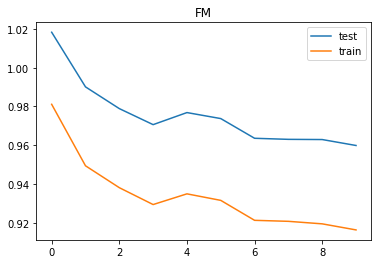

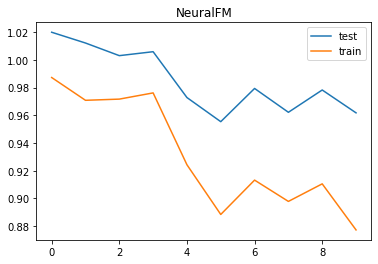

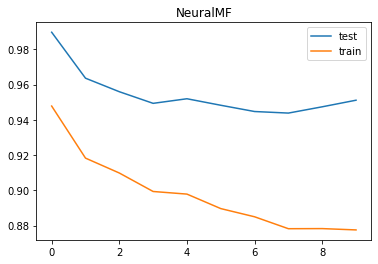

In [11]:
plot_losses(fm); plot_losses(neuralfm); plot_losses(neuralmf)

### What's next?

- Contribute to the code base! Feel free to create a PR with your contributions, if you don't know from where start check the open issues.
- Check the examples folder